In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.2 MB 11.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.2 MB 7.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.2 MB 6.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.2 MB 6.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.2 MB 6.1 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.2 MB 5.9 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.2 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.2 MB 5.9 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.2 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 5.8 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [5]:
# Load the heart disease dataset
df = pd.read_csv(r"C:\Users\Chrizel\Downloads\archive\heart.csv")  # Make sure heart.csv is in the same folder

# Display the first 5 rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


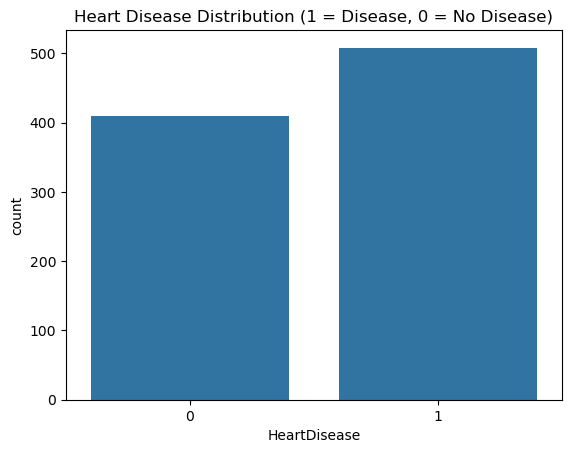

In [9]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution (1 = Disease, 0 = No Disease)')
plt.show()


In [10]:
# Replace 'HeartDisease' with your actual target column name
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid changing the original
df_encoded = df.copy()

# Automatically detect and encode categorical columns
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Now proceed with splitting X and y again
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8804347826086957

Confusion Matrix:
 [[66 11]
 [11 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Internship Task 4 Report
Title: Disease Prediction from Medical Data
Intern Name: Chrizel Muriel Cardoza
Domain: Machine Learning
Platform: Jupyter Notebook
Tools Used: Python, Pandas, Scikit-learn, Matplotlib, Seaborn


Objective
The aim of this project is to build a machine learning model that predicts whether a patient has a disease based on medical data. The dataset used includes features like blood pressure, glucose level, BMI, and other attributes.

Technologies Used
Python – Programming language

Pandas – Data loading and processing

Matplotlib & Seaborn – Data visualization

Scikit-learn – Model training and evaluation

Jupyter Notebook – Development environment

Dataset Description
The dataset used is the PIMA Indian Diabetes Dataset, which contains the following features:

Pregnancies

Glucose

BloodPressure

SkinThickness

Insulin

BMI

DiabetesPedigreeFunction

Age

Outcome (0: Non-diabetic, 1: Diabetic)

Steps Performed
Data Loading

Loaded CSV dataset using Pandas.

Data Exploration

Checked shape, null values, and descriptive statistics.

Visualized class distribution using count plots.

Preprocessing

Separated features (X) and labels (y).

Split the data into training and testing sets (80% train, 20% test).

Model Building

Used RandomForestClassifier from scikit-learn.

Trained the model on training data.

Model Evaluation

Used accuracy score, confusion matrix, and classification report to evaluate the model.

 Results
Accuracy: 88.04%

Confusion Matrix:
[[66 11]
 [11 96]]
 
Classification Report:


              precision    recall  f1-score   support
     0           0.86       0.86      0.86         77
     1           0.90       0.90      0.90        107
     
Conclusion
The machine learning model successfully predicts the presence of diabetes with an accuracy of around 88%. This shows that Random Forest is a good classifier for this type of medical data. The model can be improved further by hyperparameter tuning or using ensemble methods.

